# HEART DISEASE ANALYSIS

#### Overview:
The Heart Disease Prediction project aims to develop a machine learning model that predicts the likelihood of heart disease based on various medical features. These features include vital signs (e.g., age, blood pressure, cholesterol), medical history (e.g., chest pain type, rest ECG), and other factors (e.g., exercise-induced angina, thalach). The dataset is balanced and contains 13 input features, and the target variable indicates whether or not a patient has heart disease.

For this project, we are using multiple machine learning algorithms, with a focus on evaluating the performance of the Random Forest model, which showed the highest accuracy of 0.98 during the evaluation phase. The model will be evaluated using metrics such as accuracy, confusion matrix, and the classification report.

#### Objective:

The main objective of this project is to build a predictive model that can accurately classify individuals as having heart disease or not. Specifically, the goals are:

Model Selection and Training:

Train and evaluate multiple models (Logistic Regression, Random Forest, SVM) to identify the best performing model.
Select the Random Forest classifier due to its highest accuracy.
Model Evaluation:

Visualize the model's performance using a confusion matrix, which helps identify the model’s true positives, false positives, true negatives, and false negatives.
Generate a classification report that provides precision, recall, F1-score, and support for both classes (heart disease vs. no heart disease).
Deployment Readiness:

Ensure the model is robust, interpretable, and ready for potential deployment in clinical settings or further research.
By the end of this project, the model will help in predicting heart disease with high accuracy, potentially aiding doctors or healthcare professionals in making informed decisions for patient care.

## Import Necessary Libararies 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings



warnings.filterwarnings('ignore')


# DATA VIEW 

In [2]:
df=pd.read_csv(r'C:\Users\Windows\Downloads\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# EDA 

## Correlation heatmap

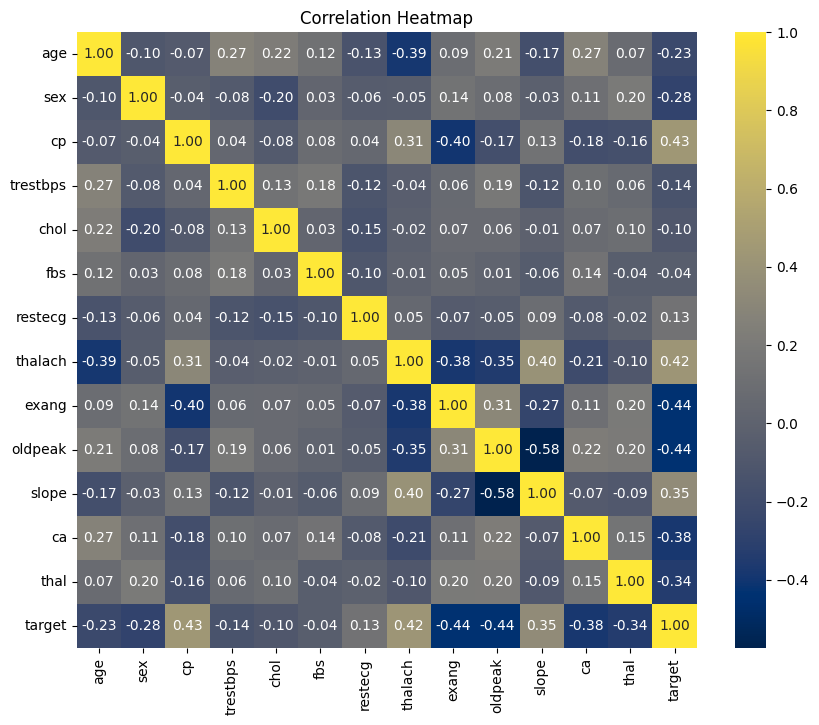

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="cividis", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Distribution of target variable

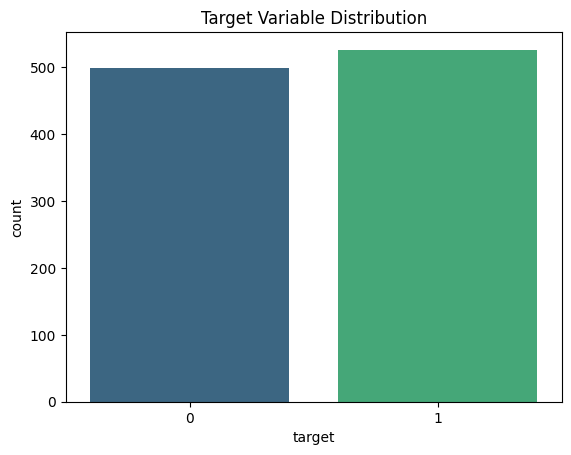

In [10]:
sns.countplot(data=df, x='target', palette='viridis')
plt.title("Target Variable Distribution")
plt.show()

## Pairplotting 

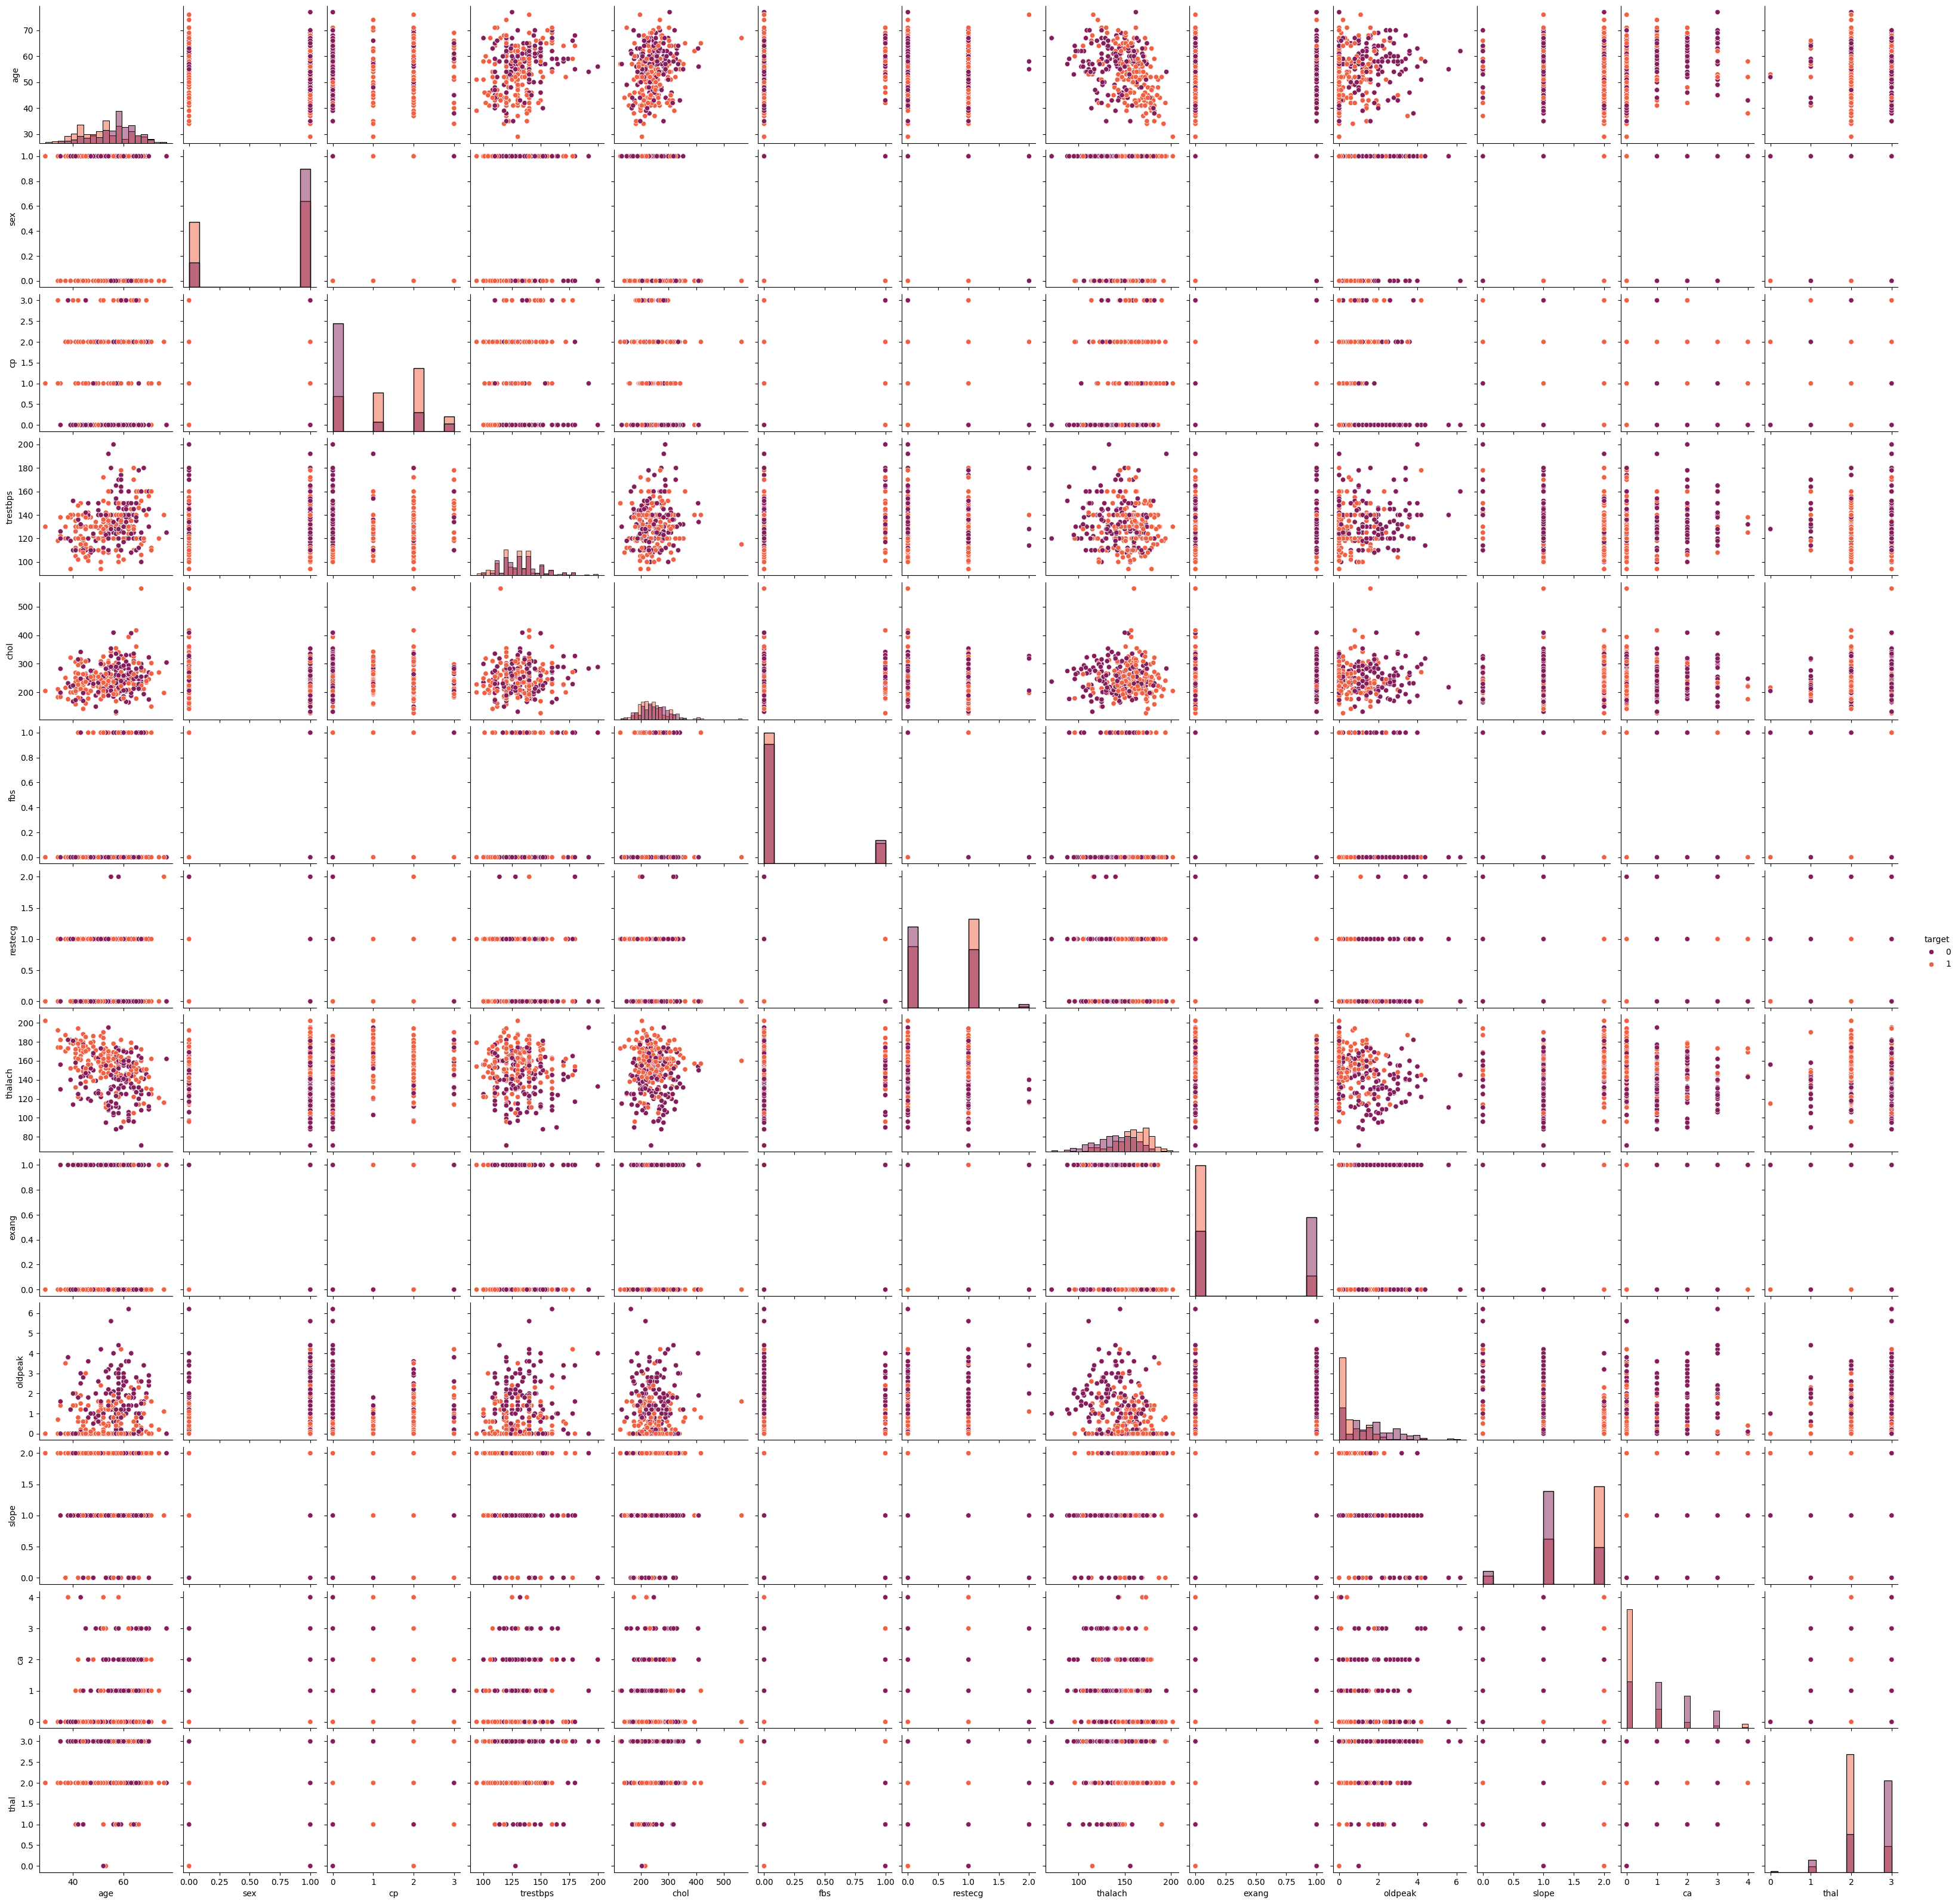

In [11]:
sns.pairplot(df, diag_kind="hist", hue="target", palette="rocket")

#  Define Features and Target

In [12]:
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#  Preprocessing Pipeline

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X.columns)
    ]
)

# Model Building and Evaluation

In [15]:
# Models to benchmark
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}


In [16]:
# Iterate through models and evaluate
results = {}  # To store model performance

for name, model in models.items():
    print(f"\nTraining and Evaluating Model: {name}")
    
    # Define a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Use Stratified K-Fold for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform cross-validation and calculate mean accuracy
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='accuracy')
    results[name] = np.mean(cv_scores)
    
    print(f"Cross-Validation Scores for {name}: {cv_scores}")
    print(f"Mean Accuracy for {name}: {results[name]:.4f}")



Training and Evaluating Model: Logistic Regression
Cross-Validation Scores for Logistic Regression: [0.8597561  0.85365854 0.81097561 0.84146341 0.84756098]
Mean Accuracy for Logistic Regression: 0.8427

Training and Evaluating Model: Random Forest
Cross-Validation Scores for Random Forest: [0.95731707 1.         0.98780488 0.96341463 0.99390244]
Mean Accuracy for Random Forest: 0.9805

Training and Evaluating Model: Support Vector Machine
Cross-Validation Scores for Support Vector Machine: [0.8902439  0.87804878 0.90243902 0.88414634 0.92073171]
Mean Accuracy for Support Vector Machine: 0.8951


# Display benchmark results

In [17]:
print("\nModel Evaluation Results:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")


Model Evaluation Results:
Logistic Regression: 0.8427
Random Forest: 0.9805
Support Vector Machine: 0.8951


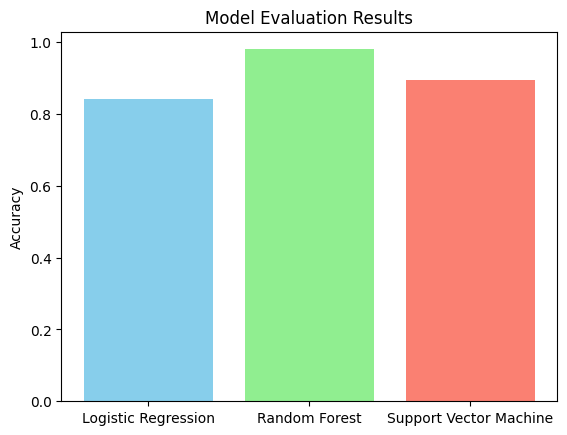

In [18]:
model_names = list(results.keys())
scores = list(results.values())

# Create a simple bar plot
plt.bar(model_names, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Model Evaluation Results')

# Show the plot
plt.show()

### Clearly Random Forest performed well 

In [19]:
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [20]:
random_forest_pipeline.fit(X_train, y_train)
y_pred = random_forest_pipeline.predict(X_test)

## Visualising RESULTS 

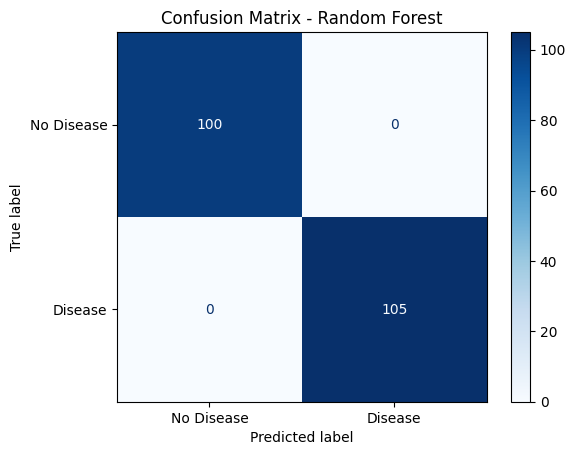

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Disease']))


Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      1.00      1.00       100
     Disease       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## Let's Check on SAMPLE DATA 

In [23]:
# Sample input data for prediction (e.g., a single patient)
sample_input = {
    'age': 55,            # Age of the patient
    'sex': 1,             # Sex (1: Male, 0: Female)
    'cp': 3,              # Chest pain type (e.g., 3 for typical angina)
    'trestbps': 130,      # Resting blood pressure (in mm Hg)
    'chol': 240,          # Serum cholesterol (in mg/dl)
    'fbs': 0,             # Fasting blood sugar (1: > 120 mg/dl, 0: otherwise)
    'restecg': 1,         # Resting electrocardiographic results (1: normal)
    'thalach': 160,       # Maximum heart rate achieved
    'exang': 1,           # Exercise induced angina (1: yes, 0: no)
    'oldpeak': 1.5,       # ST depression induced by exercise relative to rest
    'slope': 2,           # Slope of the peak exercise ST segment (2: flat)
    'ca': 0,              # Number of major vessels colored by fluoroscopy (0-3)
    'thal': 2              # Thalassemia (2: fixed defect)
}

# Convert sample input to a DataFrame (same structure as training data)
import pandas as pd
sample_df = pd.DataFrame([sample_input])

# Predict using the trained Random Forest pipeline
prediction = random_forest_pipeline.predict(sample_df)

# Display the result
if prediction == 1:
    print("Predicted: Disease (Heart Disease)")
else:
    print("Predicted: No Disease (Healthy)")


Predicted: Disease (Heart Disease)


## THANK YOU !